## Problem 4
### Given the data in problem4.csv
1.   Simulate an MA(1), MA(2), and MA(3) process and graph the ACF and PACF of each.
What do you notice?
2.   Simulate an AR(1), AR(2), and AR(3) process and graph the ACF and PACF of each.
What do you notice?
3.  Examine the data in problem4.csv. What AR/MA process would you use to model the
data? Why?
4.   Fit the model of your choice in C along with other AR/MA models. Compare the AICc of
each. What is the best fit?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf

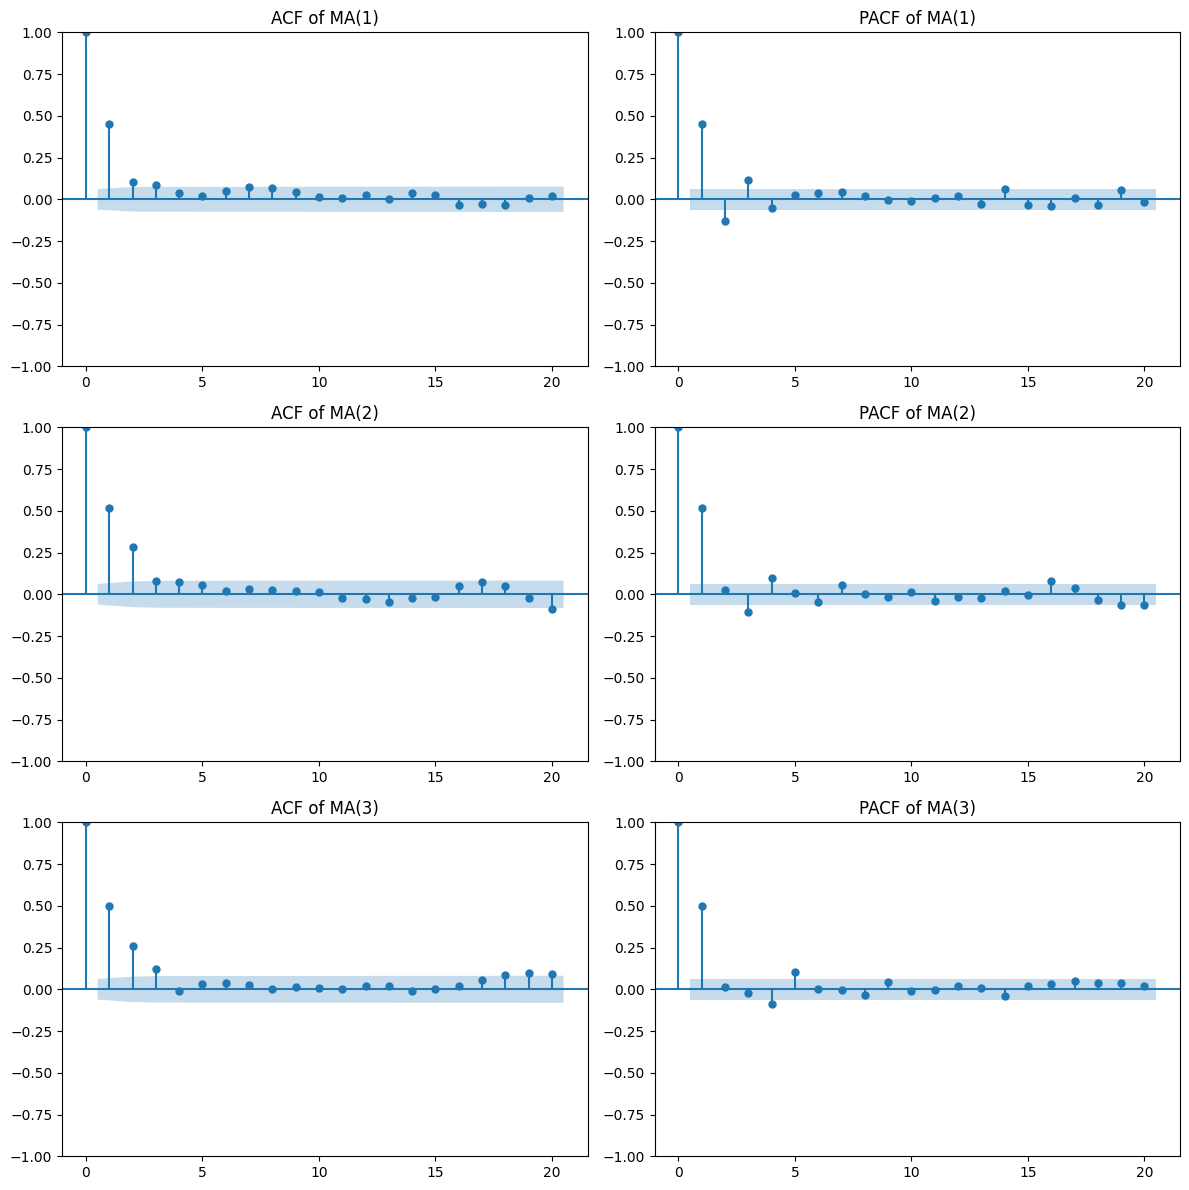

For the MA(1) process, the ACF showed a significant spike only at lag 1,     with negligible autocorrelations at higher lags, which is exactly what theory         predicts for an MA(1) process. The PACF, however, decayed gradually rather than             showing a sharp cutoff.
For the MA(2) process, the ACF showed significant spikes at lags 1 and 2,     with negligible autocorrelations at higher lags, which is exactly what theory         predicts for an MA(2) process. The PACF, however, decayed gradually rather than             showing a sharp cutoff.
For the MA(3) process, the ACF showed significant spikes at lags 1, 2, and 3,     with negligible autocorrelations at higher lags, which is exactly what theory         predicts for an MA(3) process. The PACF, however, decayed gradually rather than             showing a sharp cutoff.


In [ ]:
# 1. Simulate an MA(1), MA(2), and MA(3) process and graph the ACF and PACF of each
np.random.seed(33)
# MA(1) process
ma1 = np.array([1, 0.5])
ar = np.array([1])
ma1_process = ArmaProcess(ar, ma1)
ma1_simulated = ma1_process.generate_sample(nsample=1000)

# MA(2) process
ma2 = np.array([1, 0.5, 0.3])
ma2_process = ArmaProcess(ar, ma2)
ma2_simulated = ma2_process.generate_sample(nsample=1000)

# MA(3) process
ma3 = np.array([1, 0.5, 0.3, 0.2])
ma3_process = ArmaProcess(ar, ma3)
ma3_simulated = ma3_process.generate_sample(nsample=1000)

# Plot ACF and PACF for MA processes
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

plot_acf(ma1_simulated, ax=axes[0, 0], lags=20)
axes[0, 0].set_title('ACF of MA(1)')
plot_pacf(ma1_simulated, ax=axes[0, 1], lags=20)
axes[0, 1].set_title('PACF of MA(1)')

plot_acf(ma2_simulated, ax=axes[1, 0], lags=20)
axes[1, 0].set_title('ACF of MA(2)')
plot_pacf(ma2_simulated, ax=axes[1, 1], lags=20)
axes[1, 1].set_title('PACF of MA(2)')

plot_acf(ma3_simulated, ax=axes[2, 0], lags=20)
axes[2, 0].set_title('ACF of MA(3)')
plot_pacf(ma3_simulated, ax=axes[2, 1], lags=20)
axes[2, 1].set_title('PACF of MA(3)')

plt.tight_layout()
plt.show()
print("For the MA(1) process, the ACF showed a significant spike only at lag 1, \
    with negligible autocorrelations at higher lags, which is exactly what theory \
        predicts for an MA(1) process. The PACF, however, decayed gradually rather than \
            showing a sharp cutoff.")
print("For the MA(2) process, the ACF showed significant spikes at lags 1 and 2, \
    with negligible autocorrelations at higher lags, which is exactly what theory \
        predicts for an MA(2) process. The PACF, however, decayed gradually rather than \
            showing a sharp cutoff.")
print("For the MA(3) process, the ACF showed significant spikes at lags 1, 2, and 3, \
    with negligible autocorrelations at higher lags, which is exactly what theory \
        predicts for an MA(3) process. The PACF, however, decayed gradually rather than \
            showing a sharp cutoff.")



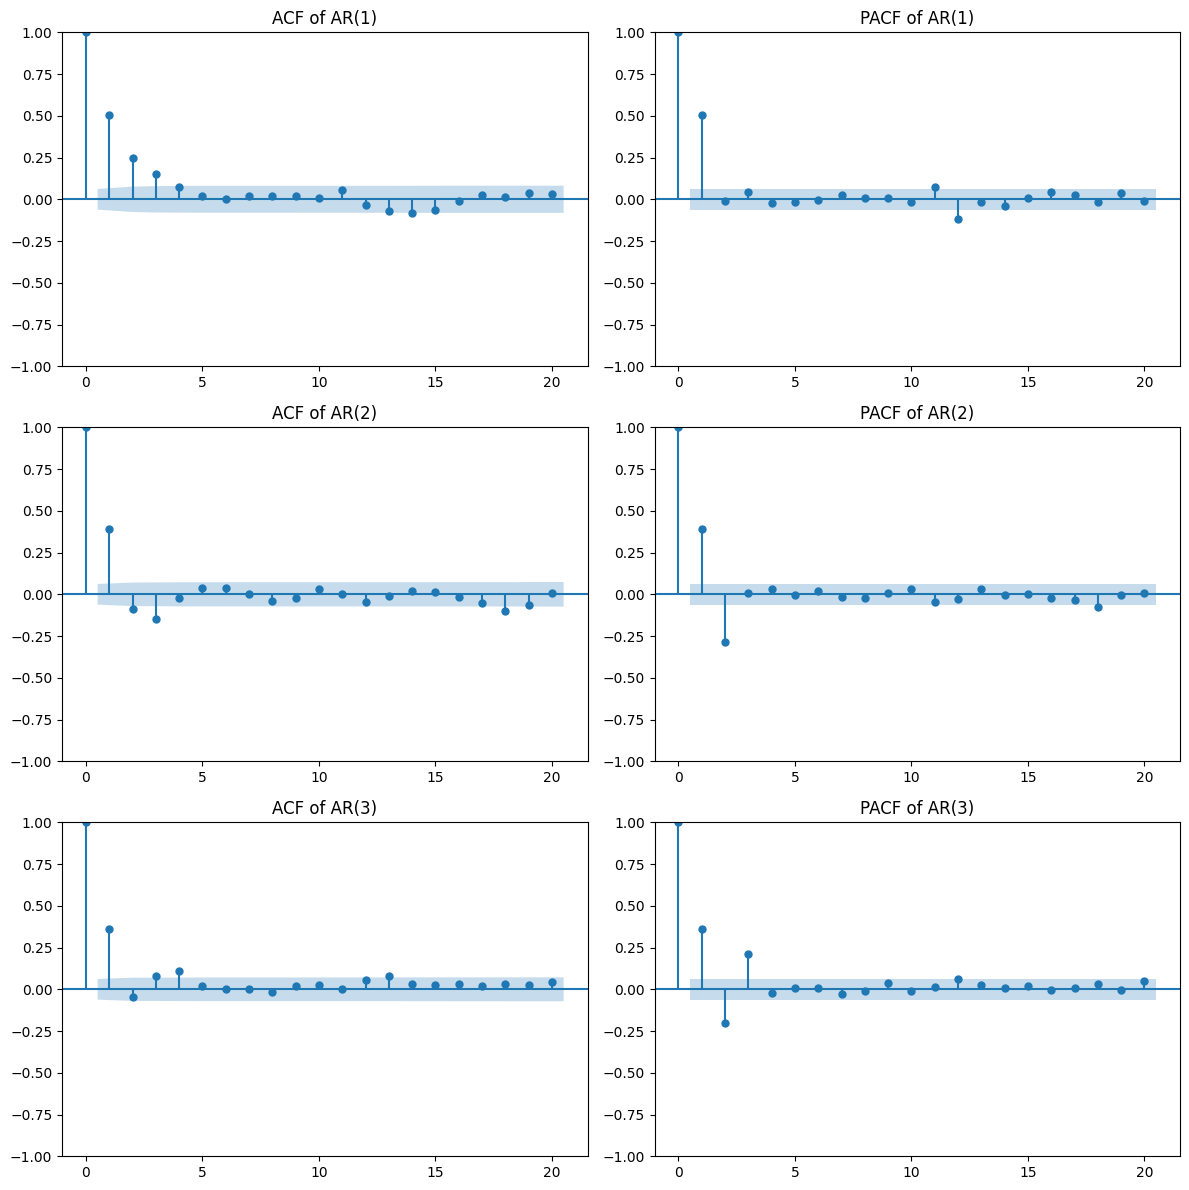

AR(1) Process:
The ACF plot for the AR(1) process shows a high autocorrelation at lag 1 that decays gradually as the lag increases. In contrast, the PACF plot exhibits a significant spike only at lag 1, with the autocorrelations at higher lags quickly falling within the confidence bounds. This is characteristic of an AR(1) process.

AR(2) Process:
For the AR(2) process, the ACF decays gradually, reflecting the influence of both lag 1 and lag 2. The PACF plot displays significant spikes at lags 1 and 2, and the values beyond lag 2 drop off sharply. This clear cutoff in the PACF after lag 2 confirms the AR(2) structure.

AR(3) Process:
In the AR(3) simulation, the ACF again decays gradually, although the pattern may be slightly more complex (potentially with some oscillatory behavior, depending on the coefficients). The PACF shows significant spikes at lags 1, 2, and 3, with lags beyond 3 being insignificant. This pattern is exactly what we expect for an AR(3) process.


In [6]:
# 2. Simulate an AR(1), AR(2), and AR(3) process and graph the ACF and PACF of each
# AR(1) process
ar1 = np.array([1, -0.5])
ma = np.array([1])
ar1_process = ArmaProcess(ar1, ma)
ar1_simulated = ar1_process.generate_sample(nsample=1000)

# AR(2) process
ar2 = np.array([1, -0.5, 0.3])
ar2_process = ArmaProcess(ar2, ma)
ar2_simulated = ar2_process.generate_sample(nsample=1000)

# AR(3) process
ar3 = np.array([1, -0.5, 0.3, -0.2])
ar3_process = ArmaProcess(ar3, ma)
ar3_simulated = ar3_process.generate_sample(nsample=1000)

# Plot ACF and PACF for AR processes
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

plot_acf(ar1_simulated, ax=axes[0, 0], lags=20)
axes[0, 0].set_title('ACF of AR(1)')
plot_pacf(ar1_simulated, ax=axes[0, 1], lags=20)
axes[0, 1].set_title('PACF of AR(1)')

plot_acf(ar2_simulated, ax=axes[1, 0], lags=20)
axes[1, 0].set_title('ACF of AR(2)')
plot_pacf(ar2_simulated, ax=axes[1, 1], lags=20)
axes[1, 1].set_title('PACF of AR(2)')

plot_acf(ar3_simulated, ax=axes[2, 0], lags=20)
axes[2, 0].set_title('ACF of AR(3)')
plot_pacf(ar3_simulated, ax=axes[2, 1], lags=20)
axes[2, 1].set_title('PACF of AR(3)')

plt.tight_layout()
plt.show()
print("AR(1) Process:\n\
The ACF plot for the AR(1) process shows a high autocorrelation at lag 1 that decays gradually as the lag increases. In contrast, the PACF plot exhibits a significant spike only at lag 1, with the autocorrelations at higher lags quickly falling within the confidence bounds. This is characteristic of an AR(1) process.\n\
\n\
AR(2) Process:\n\
For the AR(2) process, the ACF decays gradually, reflecting the influence of both lag 1 and lag 2. The PACF plot displays significant spikes at lags 1 and 2, and the values beyond lag 2 drop off sharply. This clear cutoff in the PACF after lag 2 confirms the AR(2) structure.\n\
\n\
AR(3) Process:\n\
In the AR(3) simulation, the ACF again decays gradually, although the pattern may be slightly more complex (potentially with some oscillatory behavior, depending on the coefficients). The PACF shows significant spikes at lags 1, 2, and 3, with lags beyond 3 being insignificant. This pattern is exactly what we expect for an AR(3) process.")

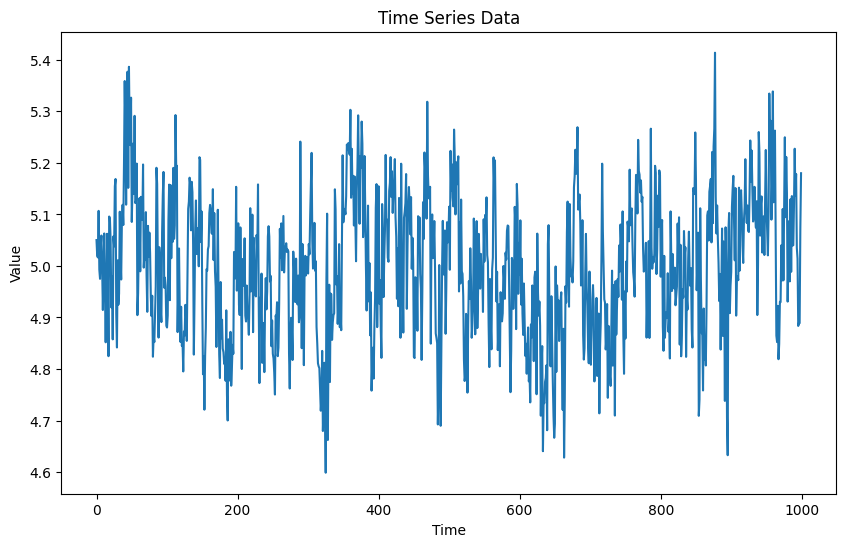

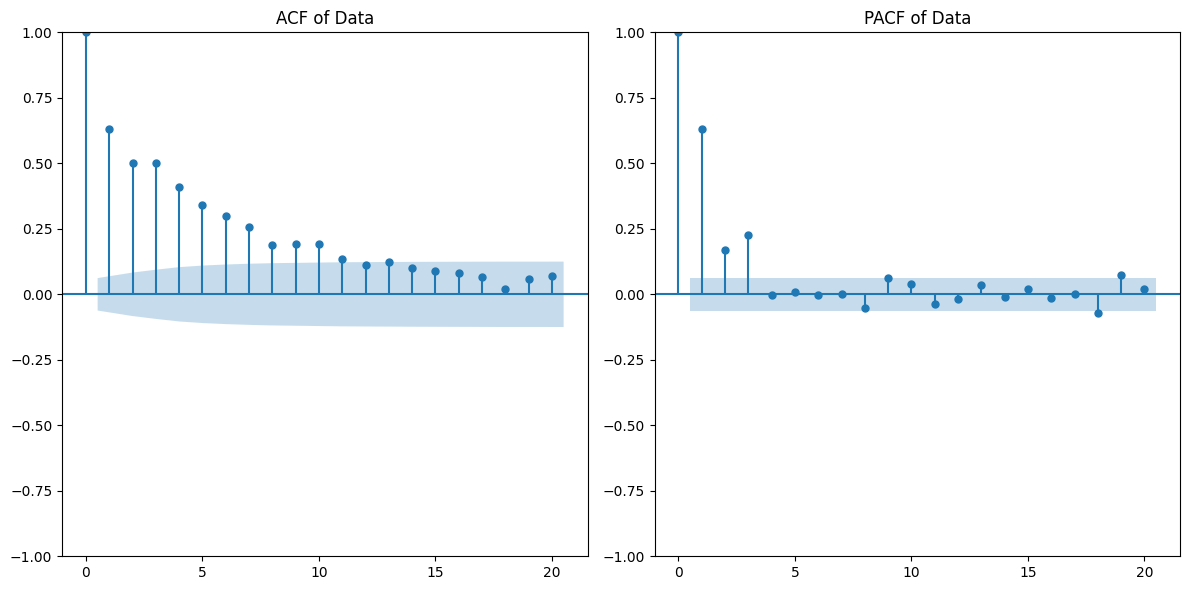

According to the PACF plot, I would use AR(3). Because the significance of the lags drops off after lag 3


In [8]:
# 3. Examine the data in problem4.csv. What AR/MA process would you use to model the data? Why?
data = pd.read_csv('problem4.csv')
data_series = data['y']

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data_series)
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Plot ACF and PACF of the data
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

plot_acf(data_series, ax=axes[0], lags=20)
axes[0].set_title('ACF of Data')
plot_pacf(data_series, ax=axes[1], lags=20)
axes[1].set_title('PACF of Data')

plt.tight_layout()
plt.show()

print("According to the PACF plot, I would use AR(3). Because the significance of the lags drops off after lag 3")


In [10]:
# 4. Fit the model of your choice in C along with other AR/MA models. Compare the AICc of each. What is the best fit?
# Fit AR(3) model; then fit AR(1)(2) and MA(1)(2)(3) models and compare AICc
models = [(3, 0, 0), (1, 0, 0), (2, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3)]
aic_values = []

for model in models:
    arima_model = ARIMA(data_series, order=model)
    arima_result = arima_model.fit()
    aic_values.append((model, arima_result.aic))

# find best based on AIC
best_model = min(aic_values, key=lambda x: x[1])
print(f"Best model based on AIC: {best_model[0]} with AIC: {best_model[1]}")

best_arima_model = ARIMA(data_series, order=best_model[0])
best_arima_result = best_arima_model.fit()

print("ARIMA model      AIC")
for i in aic_values:
    print(f"{i[0]}        {i[1]}")
    
print(best_arima_result.summary())




Best model based on AIC: (3, 0, 0) with AIC: -1746.281720902659
ARIMA model      AIC
(3, 0, 0)        -1746.281720902659
(1, 0, 0)        -1669.0892673454036
(2, 0, 0)        -1696.091685495691
(0, 0, 1)        -1508.9270332399133
(0, 0, 2)        -1559.250931870883
(0, 0, 3)        -1645.132968952571
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(3, 0, 0)   Log Likelihood                 878.141
Date:                Thu, 06 Feb 2025   AIC                          -1746.282
Time:                        22:01:52   BIC                          -1721.743
Sample:                             0   HQIC                         -1736.955
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.02